50.55925925925926


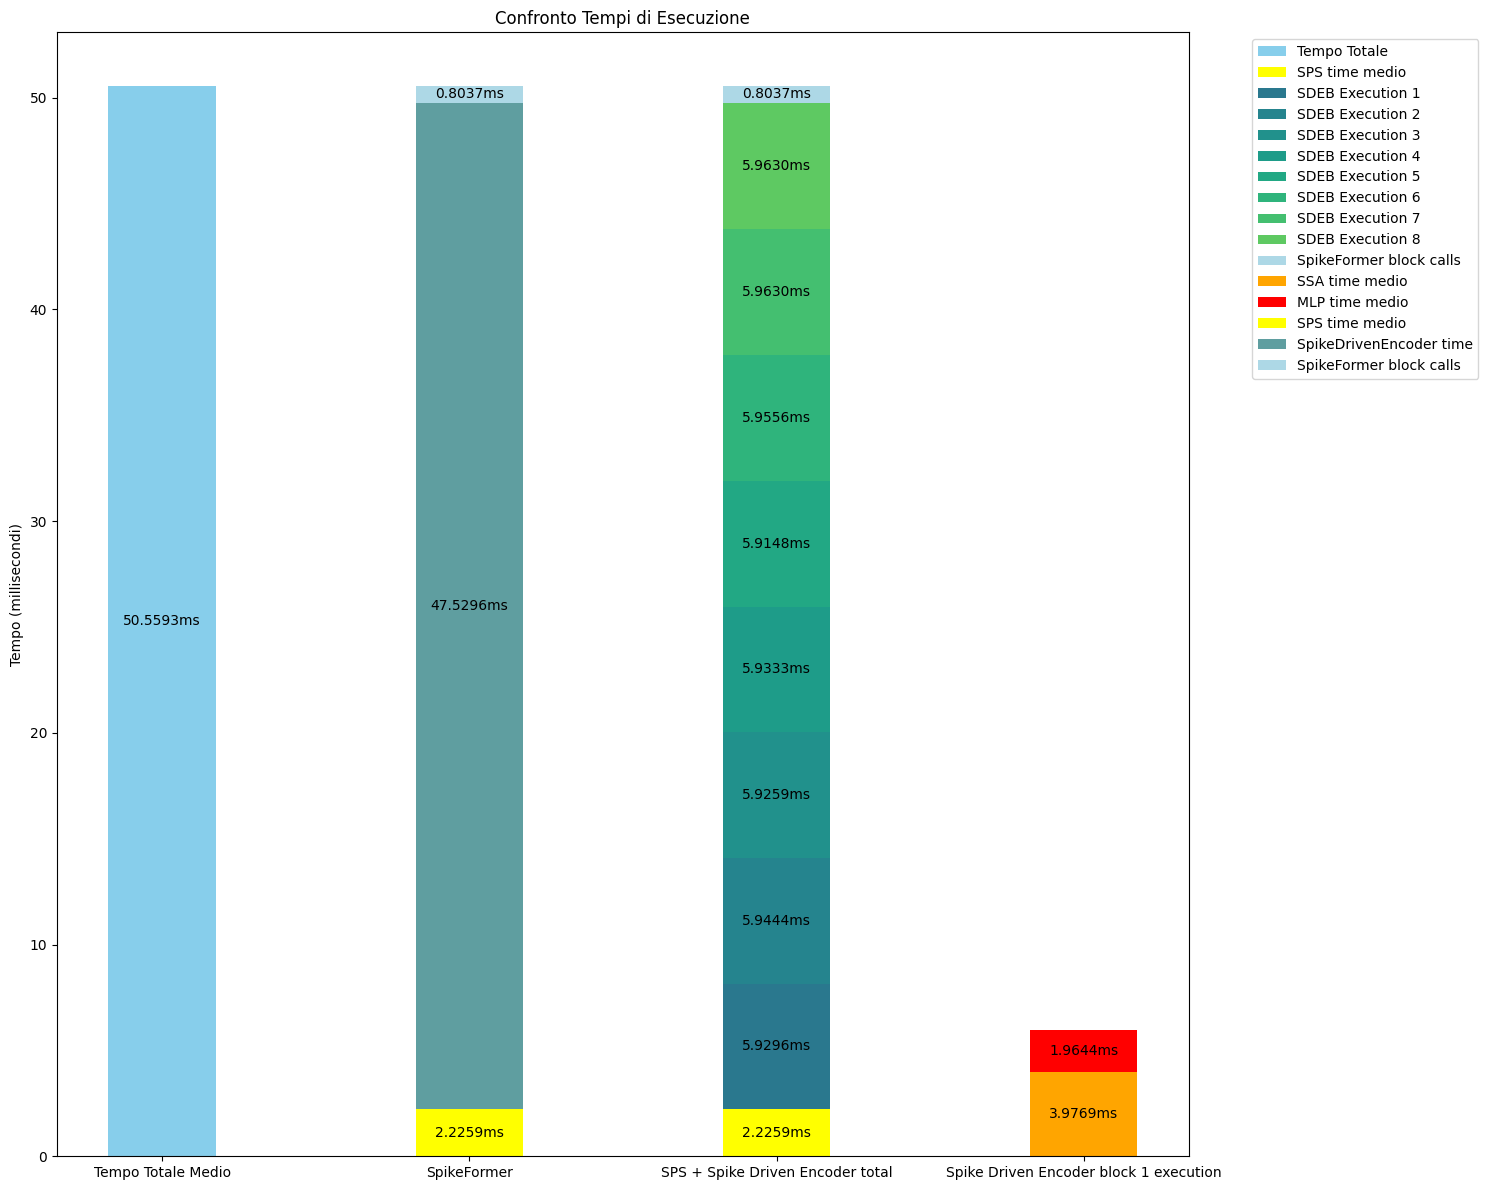

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the CSV files
df_cap5 = pd.read_csv('csv/ModelTimesCifarSpuriFix.csv')
df_hlf = pd.read_csv('csv/EncoderMeansExecSpuriFix.csv')

# Calculate mean of tempo_totale and SPS_time
mean_total = df_cap5['[Time] - Spikeformer Time time'].mean() * 1000 # Convert to milliseconds
df_sps = df_cap5.filter(items=['[Time] - SPS.PSM', '[Time] - SPS.RPE'])
df_sps = df_sps.sum(axis=1)  # Sum the values across the rows for each column
mean_sps = df_sps.mean() * 1000 # Convert to milliseconds
mean_SSA = df_cap5['[Time] - SSA Encoder'].mean() *1000 # Convert to milliseconds
# Extract row 3

#mean_SSA = df_cap5['SSA_time'].iloc[4] *1000 # Convert to milliseconds

mean_MLP = df_cap5['[Time] - MLP'].mean() *1000 # Convert to milliseconds

# Initialize mean_attn_array
mean_attn_array = np.zeros(5)


# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 12))

bar_width = 0.35
# Define df_spikeformer before using it
df_spikeformer = df_cap5.filter(['[Time] - Spikeformer Time time'])
# df_spikeformer = df_spikeformer.drop([26, 27, 28])  # Delete rows 28 and 29
df_spikeformer = df_spikeformer['[Time] - Spikeformer Time time'].mean() * 1000  # Extract the mean as a scalar
print(df_spikeformer)
# Create stacked bar plot
# First bar: Tempo Totale Medio
ax.bar('Tempo Totale Medio', df_spikeformer, bar_width, color='skyblue', label='Tempo Totale')
ax.text('Tempo Totale Medio', df_spikeformer/2, f'{df_spikeformer:.4f}ms', ha='center', va='center')

x_pos = 2  # Position for the second bar (SPS_time)

# Base bar (SPS_time)
ax.bar(x_pos, mean_sps, bar_width, color='yellow', label='SPS time medio')
ax.text(x_pos, mean_sps/2, f'{mean_sps:.4f}ms', ha='center', va='center')

# Stacked bars (HLF means)
bottom = mean_sps
height_sps_sdeb = 0
colors = plt.cm.viridis(np.linspace(0.4, 0.75, len(df_hlf)))
for i, (_, row) in enumerate(df_hlf.iterrows()):
    height = row[['SSA_MEAN', 'MLP_MEAN']].sum() *1000 # Convert to milliseconds
    ax.bar(x_pos, height, bar_width, bottom=bottom, color=colors[i], 
           label=f'SDEB Execution {i+1}')
    ax.text(x_pos, bottom + height/2, f'{height:.4f}ms', ha='center', va='center')
    bottom += height
    height_sps_sdeb += height
height_sps_sdeb+=mean_sps
ax.bar(x_pos, df_spikeformer-height_sps_sdeb, bar_width, bottom=bottom, color='lightblue', label='SpikeFormer block calls')
ax.text(x_pos, bottom + (df_spikeformer-height_sps_sdeb)/2, f'{df_spikeformer-height_sps_sdeb:.4f}ms', ha='center', va='center')

x_pos += 1  # Move to the next bar position
ax.bar(x_pos, mean_SSA, bar_width, color='orange', label='SSA time medio')
ax.text(x_pos, mean_SSA/2, f'{mean_SSA:.4f}ms', ha='center', va='center')
bottom = mean_SSA
ax.bar(x_pos, mean_MLP, bar_width, bottom=bottom,color='red', label='MLP time medio')
ax.text(x_pos, bottom + mean_MLP/2, f'{mean_MLP:.4f}ms', ha='center', va='center')


x_pos = 1  # Move to the next bar position
bottom = 0
ax.bar(x_pos, mean_sps, bar_width, color='yellow', label='SPS time medio')
ax.text(x_pos, mean_sps/2, f'{mean_sps:.4f}ms', ha='center', va='center')
bottom = mean_sps
ax.bar(x_pos, height_sps_sdeb - mean_sps, bar_width, bottom=bottom, color='cadetblue', label='SpikeDrivenEncoder time')
ax.text(x_pos, bottom + (height_sps_sdeb - mean_sps)/2, f'{height_sps_sdeb - mean_sps:.4f}ms', ha='center', va='center')
bottom += height_sps_sdeb - mean_sps
ax.bar(x_pos, df_spikeformer-height_sps_sdeb, bar_width, bottom=bottom, color='lightblue', label='SpikeFormer block calls')
ax.text(x_pos, bottom + (df_spikeformer-height_sps_sdeb)/2, f'{df_spikeformer-height_sps_sdeb:.4f}ms', ha='center', va='center')


# Customize the plot
ax.set_ylabel('Tempo (millisecondi)')
ax.set_title('Confronto Tempi di Esecuzione')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Tempo Totale Medio', 'SpikeFormer','SPS + Spike Driven Encoder total', 'Spike Driven Encoder block 1 execution'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

0    5.929630
1    5.944444
2    5.925926
3    5.933334
4    5.914815
5    5.955555
6    5.962963
7    5.962963
dtype: float64


<Axes: title={'center': 'Encoder Execution Means(millisecondi)'}, xlabel='#Encoder Execution', ylabel='Tempo (millisecondi)'>

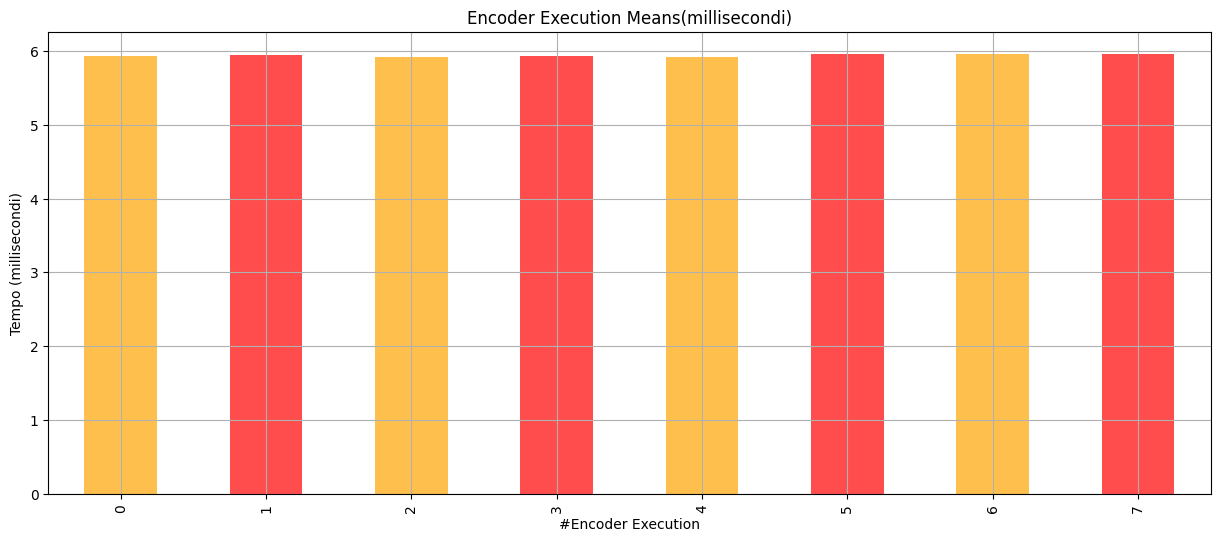

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_Encd = pd.read_csv('csv/EncoderMeansExecSpuriFix.csv').filter(items=['SSA_MEAN', 'MLP_MEAN']).sum(axis=1) * 1000  # Convert to milliseconds
print(df_Encd)

df_Encd.plot(kind='bar', figsize=(15, 6), color=['orange', 'red'], alpha=0.7, ylabel='Tempo (millisecondi)', xlabel='#Encoder Execution', title='Encoder Execution Means(millisecondi)', grid=True)

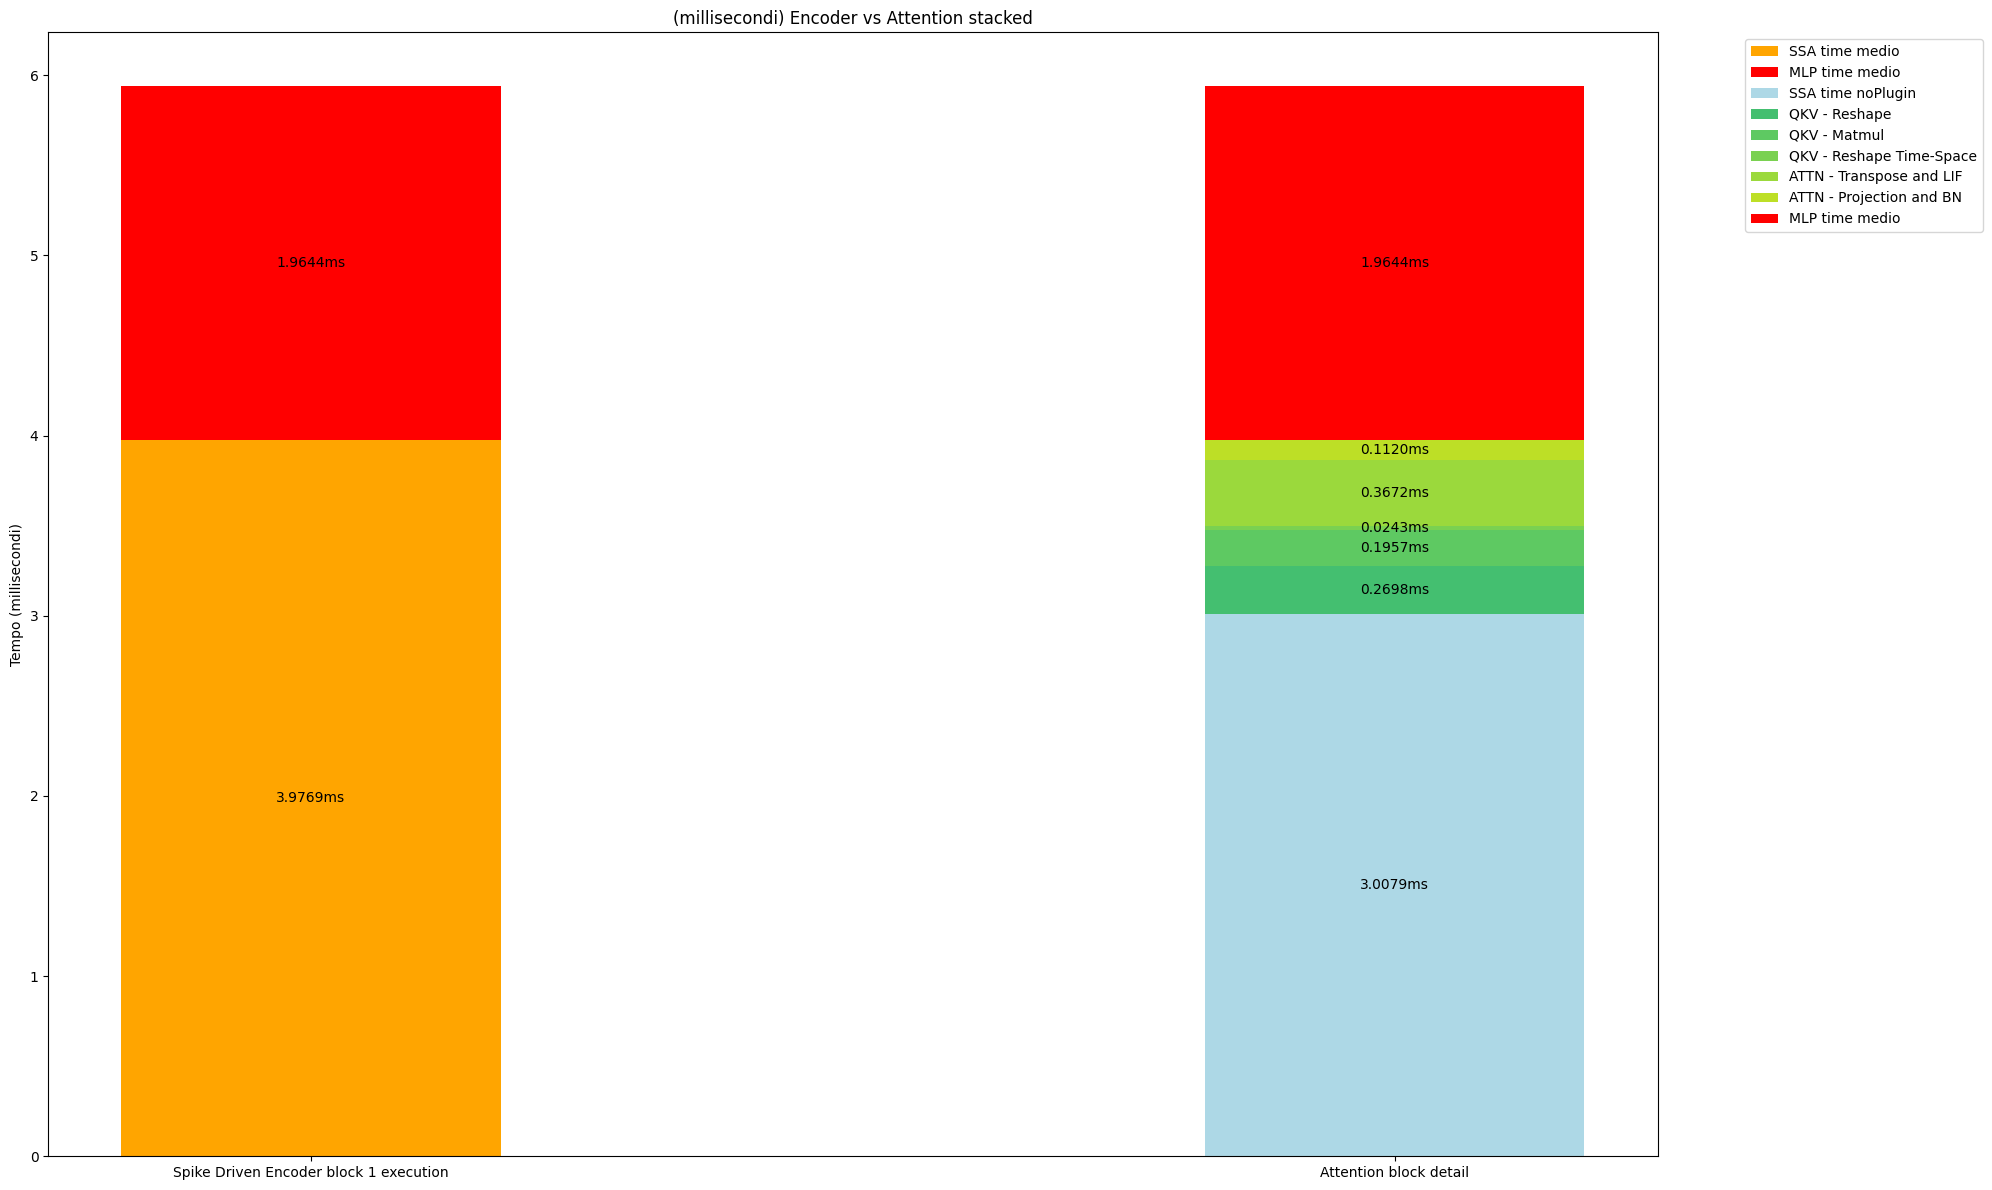

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the CSV files
df_cap = pd.read_csv('csv/ModelTimesCifarSpuriFix.csv')
df_Encoder = df_cap.filter(items=['[Time] - SSA Encoder','[Time] - MLP','[Time] - Spikeformer Time time'])
df_attn = df_cap.filter(items=['[Time] - Reshape','[Time] - Matmul','[Time] - Reshape Time-Space','[Time] - Transpose and LIF','[Time] - Projection and BN'])

# Calculate mean of tempo_totale and SPS_time (convert to milliseconds)
mean_total = df_cap['[Time] - Spikeformer Time time'].mean() * 1000
mean_SSA = df_cap['[Time] - SSA Encoder'].mean() * 1000
mean_MLP = df_cap['[Time] - MLP'].mean() * 1000

# Initialize mean_attn_array and convert to milliseconds
mean_attn_array = np.zeros(5)

names = ['QKV - Reshape','QKV - Matmul','QKV - Reshape Time-Space','ATTN - Transpose and LIF', 'ATTN - Projection and BN']
mean_attn_array[0] = df_attn['[Time] - Reshape'].mean() * 1000
mean_attn_array[1] = df_attn['[Time] - Matmul'].mean() * 1000
mean_attn_array[2] = df_attn['[Time] - Reshape Time-Space'].mean() * 1000
mean_attn_array[3] = df_attn['[Time] - Transpose and LIF'].mean() * 1000
mean_attn_array[4] = df_attn['[Time] - Projection and BN'].mean() * 1000

sum_mean_array = np.sum(mean_attn_array)
SSA_Atten_noPLugin = mean_SSA - sum_mean_array
# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 12))

bar_width = 0.35

x_pos = 0  # Move to the next bar position
ax.bar(x_pos, mean_SSA, bar_width, color='orange', label='SSA time medio')
ax.text(x_pos, mean_SSA/2, f'{mean_SSA:.4f}ms', ha='center', va='center')
bottom = mean_SSA
ax.bar(x_pos, mean_MLP, bar_width, bottom=bottom,color='red', label='MLP time medio')
ax.text(x_pos, bottom + mean_MLP/2, f'{mean_MLP:.4f}ms', ha='center', va='center')

colors = plt.cm.viridis(np.linspace(0.7, 0.9, len(mean_attn_array)))
x_pos += 1  # Move to the next bar position
ax.bar(x_pos, SSA_Atten_noPLugin, bar_width, color='lightblue', label='SSA time noPlugin')
bottom = SSA_Atten_noPLugin
ax.text(x_pos, SSA_Atten_noPLugin/2, f'{SSA_Atten_noPLugin:.4f}ms', ha='center', va='center')
# Add the attention times as stacked bars
for idx, height in enumerate(mean_attn_array):
    ax.bar(x_pos, height, bar_width, bottom=bottom, color=colors[idx], 
           label=f'{names[idx]}')
    ax.text(x_pos, bottom + height/2, f'{height:.4f}ms', ha='center', va='center')
    bottom += height
ax.bar(x_pos, mean_MLP, bar_width, bottom=bottom,color='red', label='MLP time medio')
ax.text(x_pos, bottom + mean_MLP/2, f'{mean_MLP:.4f}ms', ha='center', va='center')

# Customize the plot
ax.set_ylabel('Tempo (millisecondi)')  # Updated y-axis label
ax.set_title('(millisecondi) Encoder vs Attention stacked')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Spike Driven Encoder block 1 execution', 'Attention block detail'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'SPS times(milliseconds)')

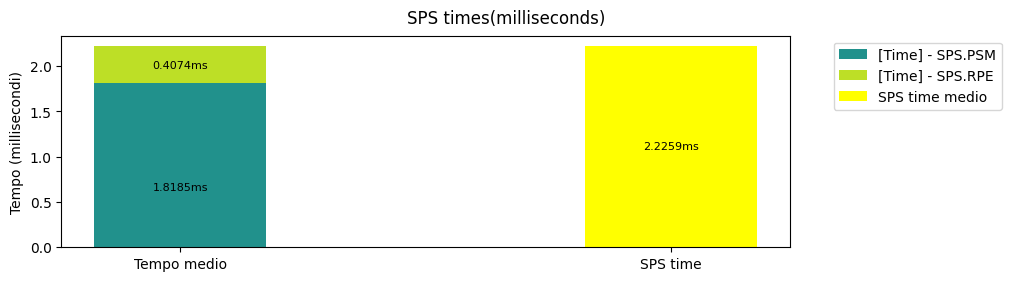

In [9]:
import matplotlib as mpl
import pandas as pd

df = pd.read_csv('csv/ModelTimesCifarSpuriFix.csv')
df_filtered = df.filter(items=['[Time] - SPS.PSM', '[Time] - SPS.RPE'])
df_SPS = df_filtered.sum(axis=1)  # Sum the values across the rows for each column
# Calculate the mean of each column
mean_values = df_filtered.mean()
#print(mean_values)
#print(df_SPS)
#mean values to milliseconds
mean_values = mean_values * 1000

fig, axs = plt.subplots(figsize=(10, 2.7), layout='constrained')
from matplotlib import cm

# Generate a colormap
colors = plt.cm.viridis(np.linspace(0.5, 0.9, len(mean_values)))
bar_width = 0.35
x_pos = 0
bottom=0
for i, v in enumerate(mean_values):
    axs.bar(x_pos, v, bar_width, bottom=bottom,color=colors[i], label=f'{mean_values.index[i]}')  # Use the correct index
    axs.text(x_pos, bottom+v/3 ,f'{v:.4f}ms', ha='center', va='bottom', fontsize=8)
    bottom += v

x_pos += 1  # Move to the next bar position
sps_mean = df_SPS.mean()  # Extract the mean as a scalar
sps_mean = sps_mean * 1000
axs.bar(x_pos, sps_mean, bar_width, color='yellow', label='SPS time medio')
axs.text(x_pos, sps_mean / 2, f'{sps_mean:.4f}ms', ha='center', va='center', fontsize=8)

axs.set_ylabel('Tempo (millisecondi)')
axs.set_xticks([0, 1])
axs.set_xticklabels(['Tempo medio', 'SPS time'])
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('SPS times(milliseconds)')


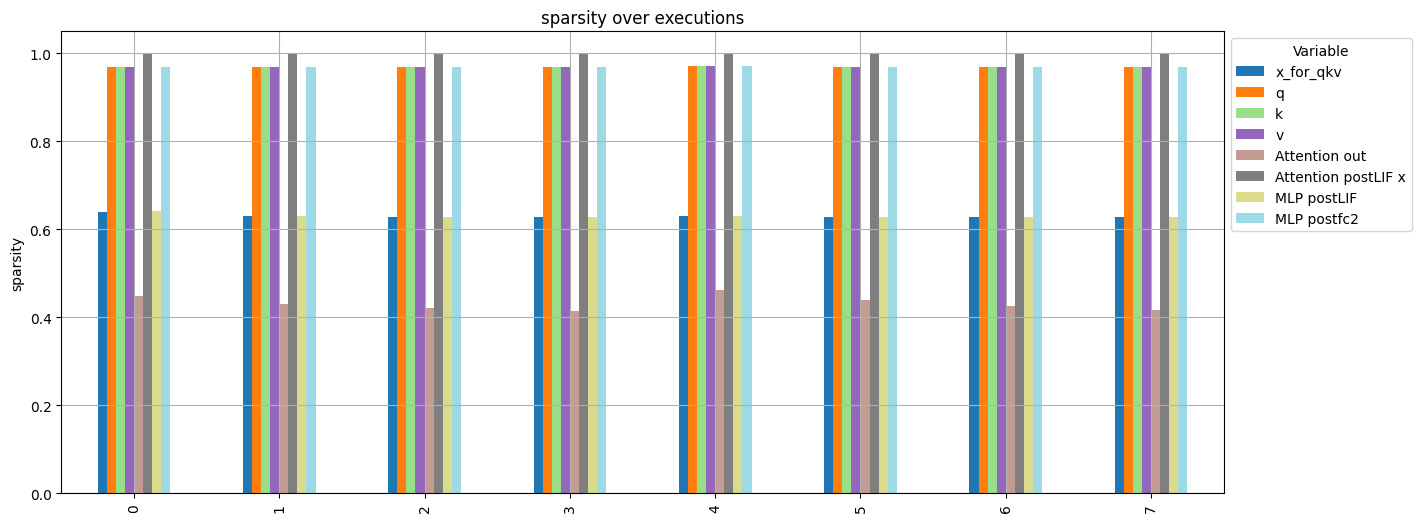

In [ ]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy to resolve the NameError
df = pd.read_csv('csv/EncoderVariablesSparsity.csv')
df = df.filter(items=['x_for_qkv','q','k','v','Attention out','Attention postLIF x','MLP postLIF','MLP postfc2'])


colors = plt.cm.tab20c(np.linspace(0.5, len(df)))
x_pos = 0
fig = df.plot(kind='bar', figsize=(15, 6), colormap='tab20', alpha=1, ylabel='sparsity', title='sparsity over executions', grid=True)
fig.legend(title='Variable', bbox_to_anchor=(1, 1), loc='upper left')

<Axes: title={'center': 'sparsity inside tensor T layers - CIFAR100'}, xlabel='Encoder execution', ylabel='sparsity'>

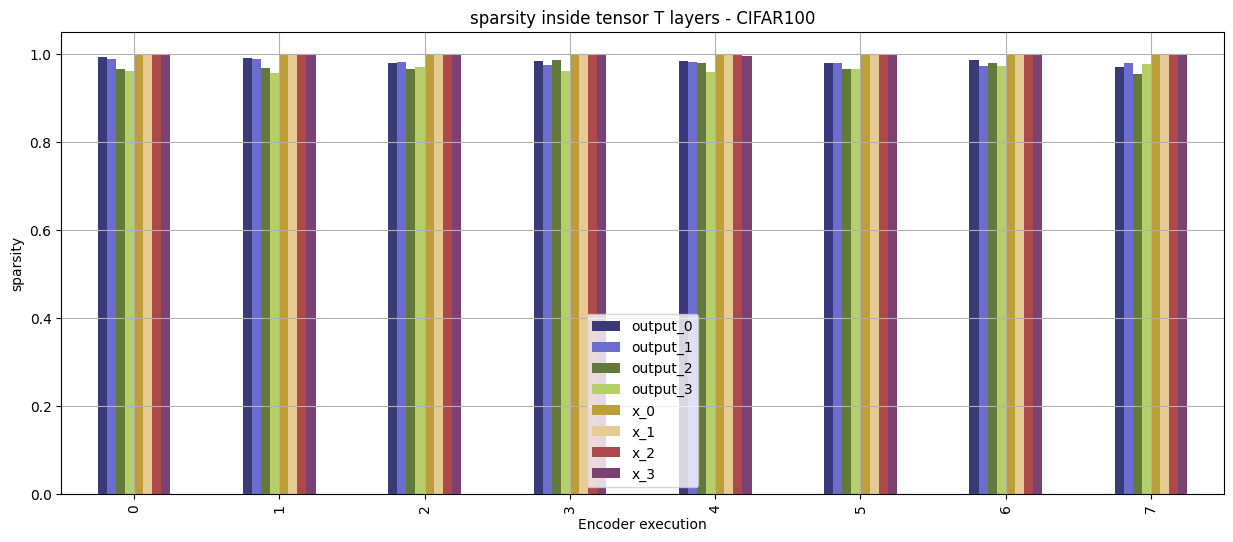

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyparsing import line as pyparsing_line

data = pd.read_csv("csv/AttentionOutTensorChunks.csv")
data = data.iloc[72:80]
colors = plt.cm.tab20b(np.linspace(0, 0.8, len(data)))
data = data.filter(items=["output_0", "output_1", "output_2", "output_3", "x_0", "x_1", "x_2", "x_3"])  # Filter rows from line 24 to 32 (inclusive)
data.plot(kind='bar', figsize=(15, 6), color=colors, alpha=1, xlabel='Encoder execution', xticks=[0, 1, 2, 3, 4, 5, 6, 7],ylabel='sparsity', title='sparsity inside tensor T layers - CIFAR100', grid=True)
